# Aprendizagem Automática - Assignment 1 

In [17]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Models and selection methods
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.base import clone
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
# Binary classifier metrics
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, accuracy_score
# Linear regression metrics
from sklearn.metrics import explained_variance_score, mean_squared_error, max_error, mean_absolute_error
from scipy.stats import pearsonr

In [24]:
# Estatisticas para regressores
def printRegStatistics(truth, preds):
    print("The RVE is: ", explained_variance_score(truth, preds))
    print("The rmse is: ", mean_squared_error(truth, preds, squared=False))
    corr, pval = pearsonr(truth, preds)
    print("The Correlation Score is is: %6.4f (p-value=%e)\n"%(corr,pval))
    print("The Maximum Error is is: ", max_error(truth, preds))
    print("The Mean Absolute Error is: ", mean_absolute_error(truth, preds))

# Previsao de resultados com cross validation
def CrossValidation(X_TRAIN, y_TRAIN, kf, model):
    TRUTH=None
    PREDS=None
    for train_index, test_index in kf.split(X_TRAIN):
        X_train, X_test = X_TRAIN[train_index], X_TRAIN[test_index]
        y_train, y_test = y_TRAIN[train_index], y_TRAIN[test_index]
        temp_model = clone(model)
        temp_model.fit(X_train, y_train)
        preds = temp_model.predict(X_test)
        if TRUTH is None:
            PREDS=preds
            TRUTH=y_test
        else:
            PREDS=np.hstack((PREDS, preds))
            TRUTH=np.hstack((TRUTH, y_test))
    return (TRUTH, PREDS)

# Estatisticas para classificadores
def printClassResults(truth, preds):
    print("The Accuracy is: %7.4f" % accuracy_score(truth, preds))
    print("The Precision is: %7.4f" % precision_score(truth, preds))
    print("The Recall is: %7.4f" % recall_score(truth, preds))
    print("The F1 score is: %7.4f" % f1_score(truth, preds))
    print("The Matthews correlation coefficient is: %7.4f" % matthews_corrcoef(truth, preds))
    print()
    print("This is the Confusion Matrix")
    print(pd.DataFrame(confusion_matrix(truth, preds)))

# Plot das previsoes vs dados reais
def displayPlot(preds, truth):
    plt.figure(figsize=(5,5))
    plt.scatter(preds, truth)
    plt.axline((0, 0), slope=1, color="red")
    plt.grid()
    plt.show()

#### Objective 1
Preparação do dataset

In [15]:
# Criar dataframe
parkinsons_objective1 = pd.read_csv("parkinsons_updrs.data")
# Remover a coluna total_UPDRS e subject#
parkinsons_objective1.drop(columns=["subject#","total_UPDRS"], inplace=True)
# Divisão do dataset em variaveis independentes e dependentes
X_obj1 = parkinsons_objective1[set(parkinsons_objective1.columns) - {"motor_UPDRS"}]
y_obj1 = parkinsons_objective1["motor_UPDRS"]
# Converter para np array
Xc_obj1 = X_obj1.to_numpy()
yc_obj1 = y_obj1.to_numpy()
# Divisão do dataset em training set e independent validation set
X_obj1_TRAIN, X_obj1_IVS, y_obj1_TRAIN, y_obj1_IVS = train_test_split(Xc_obj1, yc_obj1, test_size=0.10, random_state=314)
# Kfold split dos dados de treino
kf1 = KFold(n_splits=16, shuffle=True, random_state = 274)

C:\Users\nulga\AppData\Local\Temp\ipykernel_16608\1920151987.py:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_obj1 = parkinsons_objective1[set(parkinsons_objective1.columns) - {"motor_UPDRS"}]


### Fitting e validação dos modelos

##### Decision Tree Regressor

N-Cross validation

In [23]:
params = [
    {"max_depth" : [6,8,10,12,14,16,18,20,22,24,26,28,30],
    "min_samples_leaf" : [1,4,5,6,7,8,10,20],
    "min_samples_split" : [2,4,5,6,7,8,10,20]}]

grid_search = GridSearchCV(
    DecisionTreeRegressor(), params, scoring="neg_mean_squared_error", cv=kf1 , n_jobs=-1)

grid_search.fit(X_obj1_TRAIN, y_obj1_TRAIN)
print(grid_search.best_params_)

{'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 10}


The RVE is:  0.9187289228943093
The rmse is:  2.3194621610330985
The Correlation Score is is: 0.9590 (p-value=0.000000e+00)

The Maximum Error is is:  26.300400000000003
The Mean Absolute Error is:  0.7830567752500006


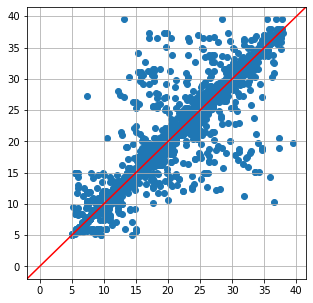

In [40]:
truth, preds = CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, grid_search.best_estimator_)
printRegStatistics(truth, preds)
displayPlot(preds, truth)

### Modelos Lineares

Regressão Linear

The RVE is:  0.15521487798481504
The rmse is:  7.478089741993551
The Correlation Score is is: 0.3945 (p-value=2.124170e-196)

The Maximum Error is is:  42.95355516498548
The Mean Absolute Error is:  6.329665584029527


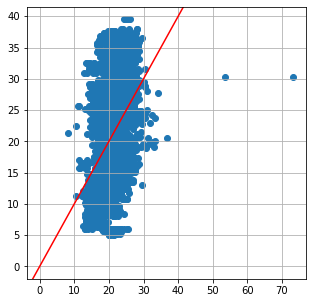

In [39]:
truth, preds = CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, LinearRegression())
printRegStatistics(truth, preds)
displayPlot(preds, truth)

Ridge

In [20]:
params_linear = [
    {"alpha" : [x*0.01 for x in range(1,100)]}]

grid_search_ridge = GridSearchCV(
    Ridge(), params_linear, scoring="neg_mean_squared_error", cv=kf1, n_jobs=-1)

grid_search_ridge.fit(X_obj1_TRAIN, y_obj1_TRAIN)
print(grid_search_ridge.best_params_)

{'alpha': 0.01}


The RVE is:  0.14447092831019281
The rmse is:  7.525491176838852
The Correlation Score is is: 0.3801 (p-value=2.246023e-181)

The Maximum Error is is:  19.415626406046634
The Mean Absolute Error is:  6.367597022147749


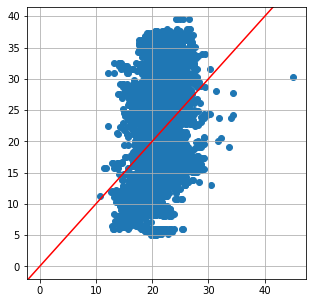

In [38]:
truth, preds = CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, grid_search_ridge.best_estimator_)
printRegStatistics(truth, preds)
displayPlot(preds, truth)

LASSO

In [22]:
params_linear = [
    {"alpha" : [x*0.001 for x in range(1,100)]}]

grid_search_lasso = GridSearchCV(
    Lasso(), params_linear, scoring="neg_mean_squared_error", cv=10, n_jobs=-1)

grid_search_lasso.fit(X_obj1_TRAIN, y_obj1_TRAIN)
print(grid_search_lasso.best_params_)

{'alpha': 0.001}


The RVE is:  0.14225866664021747
The rmse is:  7.5352148389916955
The Correlation Score is is: 0.3772 (p-value=2.269047e-178)

The Maximum Error is is:  19.79650923761098
The Mean Absolute Error is:  6.379500425359142


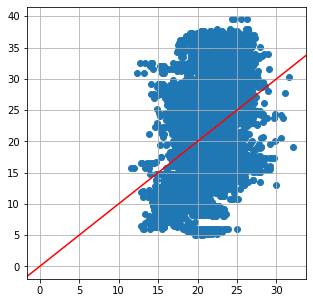

In [37]:
truth, preds = CrossValidation(X_obj1_TRAIN, y_obj1_TRAIN, kf1, grid_search_lasso.best_estimator_)
printRegStatistics(truth, preds)
displayPlot(preds, truth)

### Validação do Melhor Modelo

The RVE is:  0.8622302130156194
The rmse is:  2.9920642068003667
The Correlation Score is is: 0.9307 (p-value=4.539548e-258)

The Maximum Error is is:  20.366000000000003
The Mean Absolute Error is:  1.0061989272891698


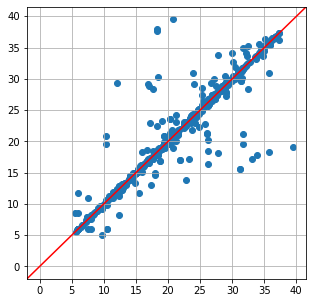

In [29]:
# Melhor modelo foi DecisionTreeRegressor, com os seguintes parametros:
# {'max_depth': 22, 'min_samples_leaf': 1, 'min_samples_split': 10}
obj1_model = DecisionTreeRegressor(max_depth=22, min_samples_leaf=1, min_samples_split=10)
obj1_model.fit(X_obj1_TRAIN, y_obj1_TRAIN)
obj1_IVS_preds = obj1_model.predict(X_obj1_IVS)
printRegStatistics(y_obj1_IVS, obj1_IVS_preds)
displayPlot(obj1_IVS_preds, y_obj1_IVS)

## Objective 2
Preparação do dataset

In [6]:
# Criar dataframe
parkinsons_objective2 = pd.read_csv("parkinsons_updrs.data")
# Remover a coluna subject# e motor_UPDRS
parkinsons_objective2.drop(columns=["subject#","motor_UPDRS"], inplace=True)
# Transformação de total_UPDRS em variavel binaria
parkinsons_objective2["total_UPDRS"] = parkinsons_objective2["total_UPDRS"].apply(lambda x : 1 if x > 40 else 0)
X_obj2 = parkinsons_objective2[set(parkinsons_objective2.columns) - {"total_UPDRS"}]
y_obj2 = parkinsons_objective2["total_UPDRS"]
# Converter para np array
Xc_obj2 = X_obj2.to_numpy()
yc_obj2 = y_obj2.to_numpy()
# Divisprint(y_obj2)ão do dataset em training set e independent validation set
X_obj2_TRAIN, X_obj2_IVS, y_obj2_TRAIN, y_obj2_IVS = train_test_split(Xc_obj2, yc_obj2, test_size=0.10, random_state=314)
# Kfold
kf2 = KFold(n_splits=16, shuffle=True, random_state = 274)

C:\Users\nulga\AppData\Local\Temp\ipykernel_16608\3288949398.py:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X_obj2 = parkinsons_objective2[set(parkinsons_objective2.columns) - {"total_UPDRS"}]


### Fitting e validação dos modelos

##### Decision Tree Classifier

In [9]:
params = [
    {"max_depth" : [6,8,10,12,14,16,18,20,22,24,26,28,30],
    "min_samples_leaf" : [1,2,5,10,20],
    "min_samples_split" : [2,5,10,20],
    "criterion":['gini','entropy']}]

grid_search_treeclass = GridSearchCV(
    DecisionTreeClassifier(), params, scoring="f1", cv=kf2, n_jobs=-1)

grid_search_treeclass.fit(X_obj2_TRAIN, y_obj2_TRAIN)
print(grid_search_treeclass.best_params_)

{'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 5}


In [44]:
printClassResults(*CrossValidation(X_obj2_TRAIN, y_obj2_TRAIN, kf2, grid_search_treeclass.best_estimator_))

The Accuracy is:  0.9930
The Precision is:  0.9877
The Recall is:  0.9713
The F1 score is:  0.9794
The Matthews correlation coefficient is:  0.9753

This is the Confusion Matrix
      0    1
0  4369   11
1    26  881


##### Regressão Logística

In [31]:
scaler = StandardScaler()
scaler.fit(X_obj2_TRAIN)
X_train = scaler.transform(X_obj2_TRAIN)
X_ivs = scaler.transform(X_obj2_IVS)

In [48]:
params = [
    {"C" : [x*0.1 for x in range(1,11)],
    "max_iter" : [999999]}]

grid_search_log = GridSearchCV(
    LogisticRegression(), params, scoring="f1", cv=kf2, n_jobs=-1)

grid_search_log.fit(X_train, y_obj2_TRAIN)
print(grid_search_log.best_params_)

{'C': 0.5, 'max_iter': 999999}


In [49]:
printClassResults(*CrossValidation(X_train, y_obj2_TRAIN, kf2, grid_search_log.best_estimator_))

The Accuracy is:  0.8277
The Precision is:  0.4524
The Recall is:  0.0209
The F1 score is:  0.0400
The Matthews correlation coefficient is:  0.0667

This is the Confusion Matrix
      0   1
0  4357  23
1   888  19


#### Validação do Melhor Modelo

In [35]:
# Melhor modelo foi DecisionTreeRegressor, com os seguintes parametros:
# {'criterion': 'entropy', 'max_depth': 24, 'min_samples_leaf': 2, 'min_samples_split': 5}
obj2_model = DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=2, min_samples_split=5)
obj2_model.fit(X_train, y_obj2_TRAIN)
obj2_IVS_preds = obj2_model.predict(X_ivs)
printClassResults(y_obj2_IVS, obj2_IVS_preds)

The Accuracy is:  0.9949
The Precision is:  0.9800
The Recall is:  0.9899
The F1 score is:  0.9849
The Matthews correlation coefficient is:  0.9819

This is the Confusion Matrix
     0   1
0  487   2
1    1  98
